In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

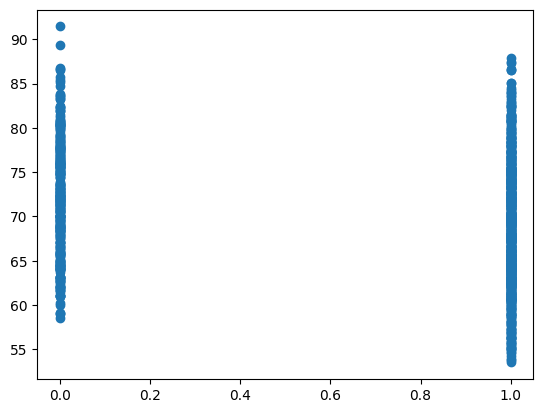

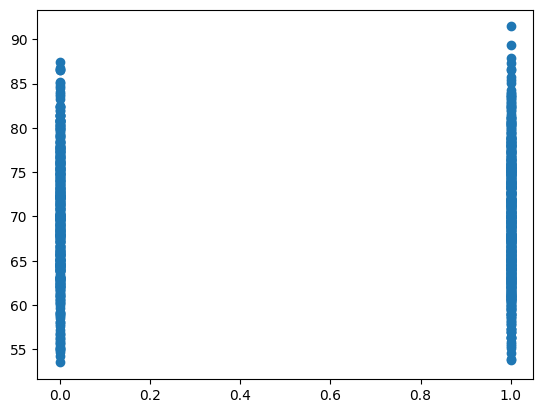

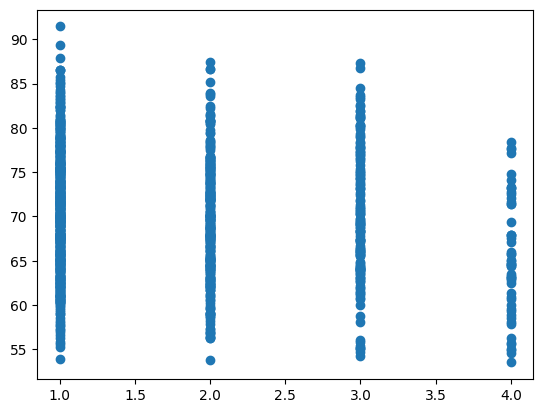

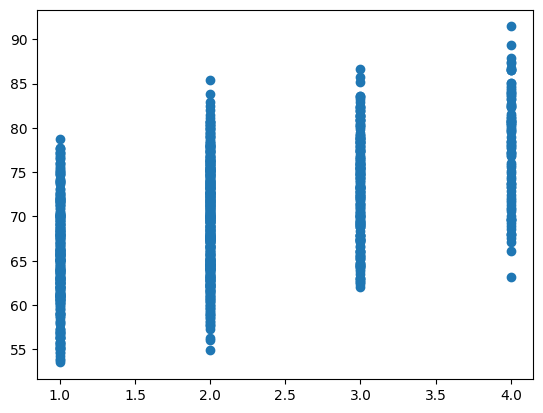

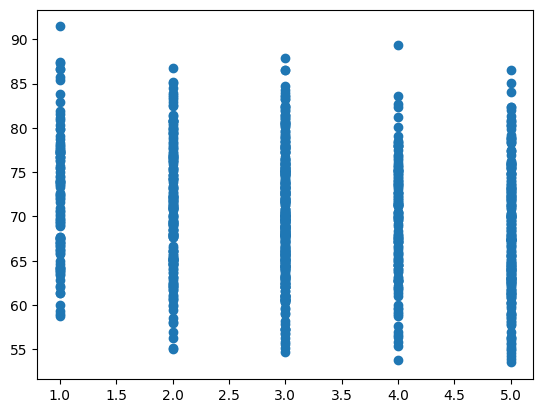

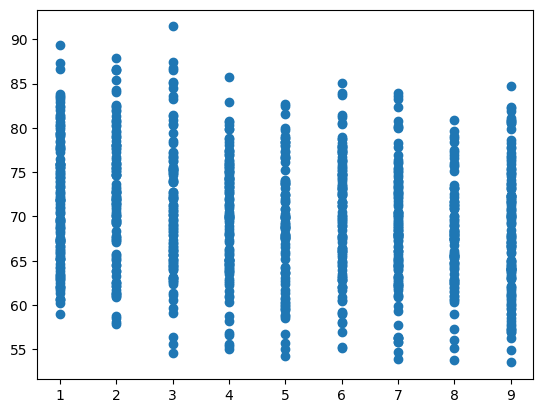

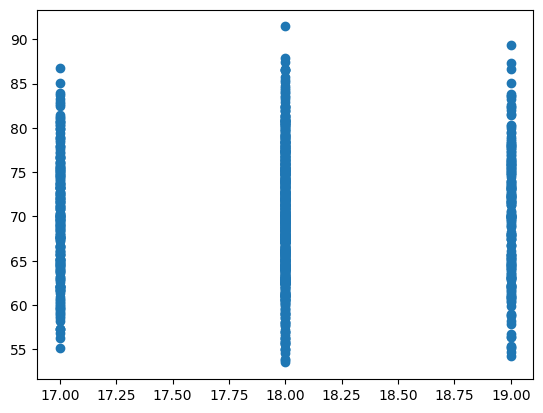

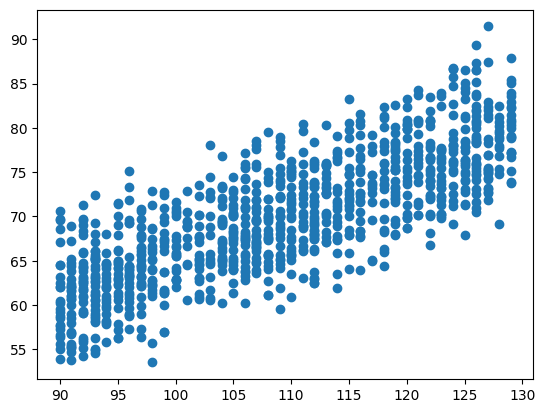

In [6]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
# print(x_train)
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
# print(y_train)
# Try plotting y_train with different features

# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM



def feature_changing(x_train):
    for i in range(len(x_train)):
        if x_train[i,0] == "yes":
            x_train[i,0] = 1
        else:
            x_train[i,0] = 0
        if x_train[i,1] == "M":
            x_train[i,1] = 1
        else:
            x_train[i,1] = 0
    return x_train

x_train = feature_changing(x_train)

for i in range(8):
    plt.scatter(x_train[:,i], y_train)
    plt.show()

In [7]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    x_train = x_train.astype(np.float64)
    return x_train, x_std, x_mean

In [8]:
def cost(x_train, y_train, w, b):
    m = len(y_train)
    y_pred = np.dot(x_train, w) + b
    loss = np.sum((y_pred - y_train) ** 2) / (2 * m)
    return loss

In [9]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.1, num_iterations=1000):
    m = len(y_train)
    for iteration in range(num_iterations):
        y_pred = np.dot(x_train, w) + b
        error = y_pred - y_train
        grad_w = (1/m) * np.dot(x_train.T, error)
        grad_b = (1/m) * np.sum(error)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

    return w, b


In [10]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)
# print(f"w: {w}")
# print(f"b: {b}")

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
#   print(f"w: {w}")
#   print(f"b: {b}")

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
